<a href="https://colab.research.google.com/github/jaskiratkalra26/jaskirat_assignment1_DL/blob/main/Q9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9.IMPLEMENT A NEURAL NETWORK TO SOLVE A MULTI-CLASS CLASSIFICATION PROBLEM AND EVALUATE DIFFERENT WEIGHT INITIALIZATION TECHNIQUES.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def initialize_weights(input_size, hidden_size, output_size, method='random'):
    if method == 'random':
        W1 = np.random.randn(input_size, hidden_size) * 0.1
        W2 = np.random.randn(hidden_size, output_size) * 0.1
    elif method == 'xavier':
        W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
        W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)
    elif method == 'he':
        W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
    else:
        raise ValueError("Initialization method must be 'random', 'xavier', or 'he'.")

    b1 = np.zeros((1, hidden_size))
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, initialization='random', lr=0.01): # Corrected the constructor name to __init__
        np.random.seed(42)
        self.lr = lr
        self.W1, self.b1, self.W2, self.b2 = initialize_weights(input_size, hidden_size, output_size, initialization)

    # ... (rest of the class code remains the same)

    def forward(self, X):
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = relu(self.Z1)  # Hidden layer activation (ReLU)
        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = softmax(self.Z2)  # Output layer activation (Softmax)
        return self.A2

    def backward(self, X, y):
        m = X.shape[0]

        # Compute gradients
        dZ2 = self.A2 - y
        dW2 = (self.A1.T @ dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * relu_derivative(self.Z1)  # Backprop through ReLU
        dW1 = (X.T @ dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update parameters
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def compute_loss(self, y_true, y_pred):
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))

    def train(self, X, y, epochs=500):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            loss_history.append(loss)
            self.backward(X, y)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

        return loss_history

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [ ]:
initializations = ['random', 'xavier', 'he']
histories = {}
for init in initializations:
    print(f"\nTraining Neural Network with {init} initialization:")
    nn = NeuralNetwork(input_size=4, hidden_size=8, output_size=3, initialization=init, lr=0.1)
    histories[init] = nn.train(X_train, y_train, epochs=500)

    y_pred_test = nn.predict(X_test)
    y_true_test = np.argmax(y_test, axis=1)
    accuracy = np.mean(y_pred_test == y_true_test) * 100
    print(f"Test Accuracy ({init}): {accuracy:.2f}%")




Training Neural Network with random initialization:
Epoch 0: Loss = 1.1062
Epoch 100: Loss = 0.3829
Epoch 200: Loss = 0.2010
Epoch 300: Loss = 0.1260
Epoch 400: Loss = 0.0915
Test Accuracy (random): 96.67%

Training Neural Network with xavier initialization:
Epoch 0: Loss = 1.2786
Epoch 100: Loss = 0.2604
Epoch 200: Loss = 0.1526
Epoch 300: Loss = 0.1030
Epoch 400: Loss = 0.0786
Test Accuracy (xavier): 93.33%

Training Neural Network with he initialization:
Epoch 0: Loss = 1.5352
Epoch 100: Loss = 0.2471
Epoch 200: Loss = 0.1477
Epoch 300: Loss = 0.0982
Epoch 400: Loss = 0.0772
Test Accuracy (he): 93.33%


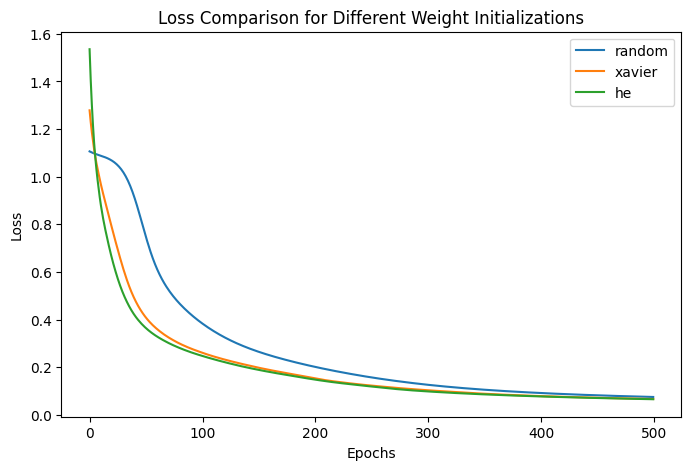

In [ ]:
plt.figure(figsize=(8, 5))
for init in initializations:
    plt.plot(histories[init], label=f'{init}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison for Different Weight Initializations')
plt.show()